In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from SuchTree import SuchTree, SuchLinkedTrees, pearson
import pandas as pd
import seaborn

In [57]:
T1 = SuchTree( 'data/gopher-louse/gopher.tree' )
T2 = SuchTree( 'data/gopher-louse/lice.tree' )
links = pd.DataFrame.from_csv( 'data/gopher-louse/gopher-louse-associations.txt' )

#T1 = SuchTree( 'data/plant-pollinators/bahe/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/bahe/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/bahe/bahe_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/beeh/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/beeh/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/beeh/beeh_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/fros/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/fros/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/fros/fros_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/hrat/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/hrat/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/hrat/hrat_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/moma/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/moma/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/moma/moma_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/nnog/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/nnog/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/nnog/nnog_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/smal/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/smal/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/smal/smal_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/wyth/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/wyth/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/wyth/wyth_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/wes/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/wes/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/wes/wes_links.csv' )
#links = links[ T1.leafs.keys() ]
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/simulated/null/group1/host.tree' )
#T2 = SuchTree( 'data/simulated/null/group1/guest.tree' )
#links = pd.DataFrame.from_csv( 'data/simulated/null/group1/links.csv' )

#T1 = SuchTree( 'data/plant-pollinators/arr3/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/arr3/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/arr3/arr3_links.csv' )
#links = links.T[ T2.leafs.keys() ]

#T1 = SuchTree( 'data/plant-pollinators/cllo/plant.tree' )
#T2 = SuchTree( 'data/plant-pollinators/cllo/animal.tree' )
#links = pd.DataFrame.from_csv( 'data/plant-pollinators/cllo/cllo_links.csv' )
#links = links.T[ T2.leafs.keys() ]


SLT = SuchLinkedTrees( T1, T2, links )

host_aj,  host_node_ids  = T1.adjacency( T1.root ).values()
guest_aj, guest_node_ids = T2.adjacency( T2.root ).values()

host_node_ids, guest_node_ids = host_node_ids.tolist(), guest_node_ids.tolist()

(0, 15)

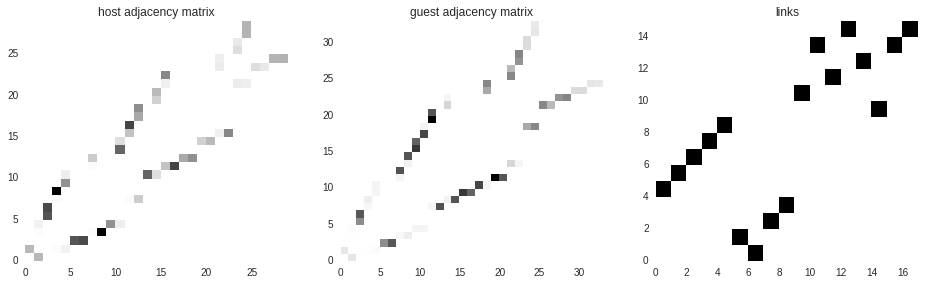

In [58]:
figure(figsize=(16,4.3))
subplot(1,3,1)
title('host adjacency matrix')
pcolor( host_aj )
xlim( (0,T1.length) )
ylim( (0,T1.length) )
subplot(1,3,2)
title('guest adjacency matrix')
pcolor( guest_aj )
xlim( (0,T2.length) )
ylim( (0,T2.length) )
subplot(1,3,3)
pcolor( links )
title('links')
xlim( (0,links.shape[1]) )
ylim( (0,links.shape[0]) )

In [59]:
guest_aj_links = map( lambda x : guest_node_ids.index(x) + host_aj.shape[0] , SLT.linklist[:,0] )
host_aj_links  = map( lambda x : host_node_ids.index(x),  SLT.linklist[:,1] )
zip(guest_aj_links, host_aj_links )

[(56, 27),
 (44, 16),
 (35, 6),
 (58, 9),
 (60, 19),
 (48, 5),
 (34, 5),
 (46, 18),
 (49, 6),
 (41, 17),
 (55, 26),
 (61, 20),
 (57, 28),
 (59, 13),
 (43, 22),
 (45, 8),
 (54, 25)]

In [60]:
def edge_mean( aj ) :
    return mean( aj.flatten()[ aj.flatten() > SLT.TreeA.polytomy_distance ] )

host_mean  = edge_mean( host_aj  / host_aj.max()  )
guest_mean = edge_mean( guest_aj / guest_aj.max() )

aj = zeros( ( host_aj.shape[0] + guest_aj.shape[0], host_aj.shape[1] + guest_aj.shape[1] ) )
aj[ 0:host_aj.shape[0], 0:host_aj.shape[1] ] = host_aj / host_aj.max()
aj[ host_aj.shape[0]:, host_aj.shape[1]: ] = guest_aj / guest_aj.max()

#for i,j in zip( random.permutation(guest_aj_links), random.permutation(host_aj_links ) ) :
for i,j in zip( guest_aj_links, host_aj_links ) :
    aj[i,j] = ( host_mean + guest_mean ) / 2.0
    aj[j,i] = ( host_mean + guest_mean ) / 2.0

(0, 62)

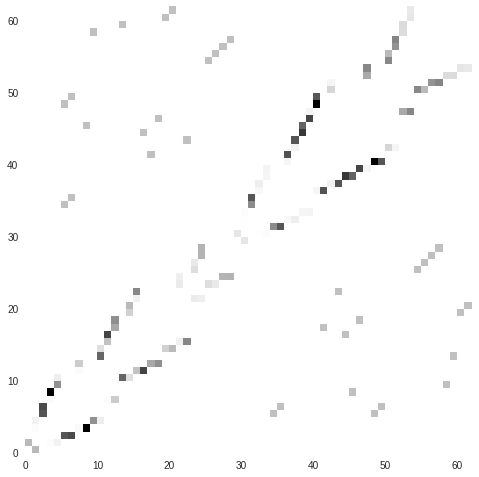

In [61]:
figure(figsize=(8,8))
pcolor(aj)
xlim( (0,aj.shape[0]) )
ylim( (0,aj.shape[1]) )

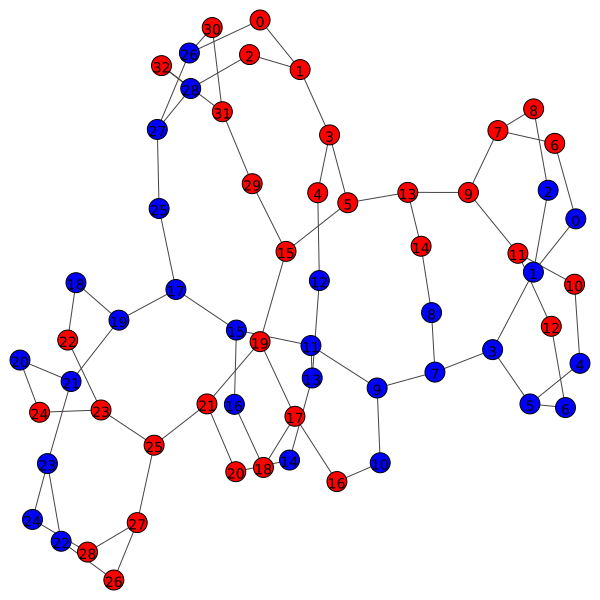

In [62]:
import igraph

g = igraph.Graph.Weighted_Adjacency( aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
g.vs['label'] = host_node_ids + guest_node_ids
g.vs['tree'] = ['host']  * len( host_node_ids ) + ['guest'] * len( guest_node_ids )
color_dict = { 'host' : 'blue', 'guest' : 'red' }
g.vs['color'] = [color_dict[tree] for tree in g.vs["tree"]]
layout = g.layout_kamada_kawai()
igraph.plot( g, layout=layout, target='gophers.png' )

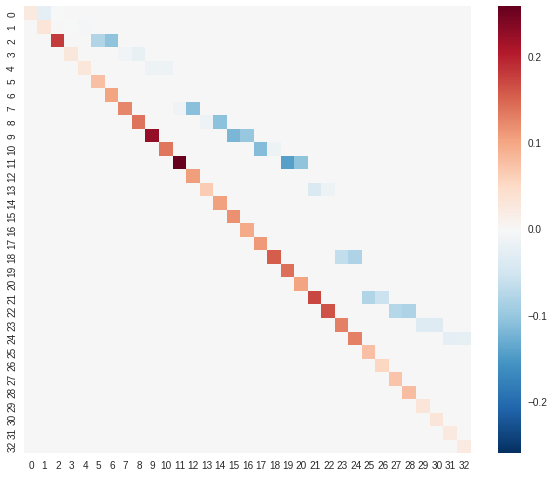

In [81]:
lp = matrix(g.laplacian( weights='weight', normalized=False ))

figure(figsize=(10,8))
seaborn.heatmap( triu(lp) )

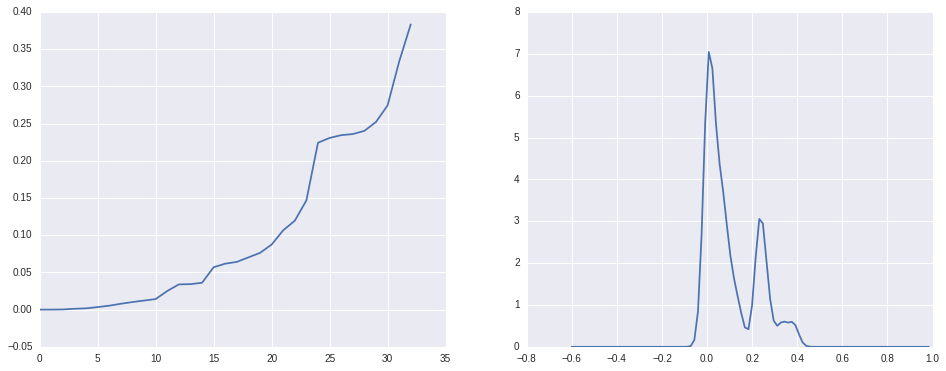

In [83]:
figure( figsize=(16,6) )
lambdas = linalg.eigvals( lp )
#plot(sorted(lambdas))
subplot(1,2,1)
plot( sorted(lambdas) )
subplot(1,2,2)
seaborn.kdeplot( lambdas, bw=0.2 )

In [84]:
def permute_links( linklist, deletions, additions, swaps ) :
    ll = array( linklist )
    for i in xrange( 1, deletions ) :
        ll = delete( ll, randint(len(ll)), axis=0 )
    for i in xrange( 1, swaps ) :
        x, y = random.choice( xrange( len(ll) ), size=2, replace=False )
        X, Y = ll[x,1], ll[y,1]
        ll[x,1] = Y
        ll[y,1] = X
    for i in xrange( 1, additions ) :
        a = random.choice( SLT.TreeA.leafs.values() )
        b = random.choice( SLT.TreeB.leafs.values() )
        ll = numpy.concatenate( (ll, array([[b,a]])), axis=0 )
    return ll

def edge_mean( aj ) :
    return mean( aj.flatten()[ aj.flatten() > SLT.TreeA.polytomy_distance ] )


def graph_spectral_density( SLT, deletions=0, additions=0, swaps=0, mode='lambdas' ) :
    
    linklist = permute_links( SLT.linklist, deletions, additions, swaps )
    
    host_aj,  host_node_ids  = SLT.TreeA.adjacency( SLT.TreeA.root ).values()
    guest_aj, guest_node_ids = SLT.TreeB.adjacency( SLT.TreeB.root ).values()
    
    host_node_ids, guest_node_ids = host_node_ids.tolist(), guest_node_ids.tolist()
    
    guest_aj_links = map( lambda x : guest_node_ids.index(x) + host_aj.shape[0] , linklist[:,0] )
    host_aj_links  = map( lambda x : host_node_ids.index(x), linklist[:,1] )
    zip(guest_aj_links, host_aj_links )
    
    aj = zeros( ( host_aj.shape[0] + guest_aj.shape[0], host_aj.shape[1] + guest_aj.shape[1] ) )
    aj[ 0:host_aj.shape[0], 0:host_aj.shape[1] ] = host_aj / host_aj.max()
    aj[ host_aj.shape[0]:, host_aj.shape[1]: ] = guest_aj / guest_aj.max()
    
    host_mean  = edge_mean( host_aj  / host_aj.max()  )
    guest_mean = edge_mean( guest_aj / guest_aj.max() )
    
    for i,j in zip( guest_aj_links, host_aj_links ) :
        aj[i,j] = ( host_mean + guest_mean ) / 2.0
        aj[j,i] = ( host_mean + guest_mean ) / 2.0
        
    if mode == 'adjacency' :
        return aj
    
    g = igraph.Graph.Weighted_Adjacency( aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
    lp = matrix(g.laplacian( weights='weight', normalized=False ))
    
    host_g = igraph.Graph.Weighted_Adjacency(  host_aj.tolist(),  mode=igraph.ADJ_UNDIRECTED )
    guest_g = igraph.Graph.Weighted_Adjacency( guest_aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
    
    host_lp  = matrix( host_g.laplacian(  weights='weight', normalized=True ))
    guest_lp = matrix( guest_g.laplacian( weights='weight', normalized=True ))
    
    if mode == 'laplacian' :
        return lp
    
    lambdas   = linalg.eigvalsh( lp )
    lambdas_h = linalg.eigvalsh( host_lp )
    lambdas_g = linalg.eigvalsh( guest_lp )
    return { 'graph' : lambdas, 'host' : lambdas_h, 'guest' : lambdas_g }
    
    

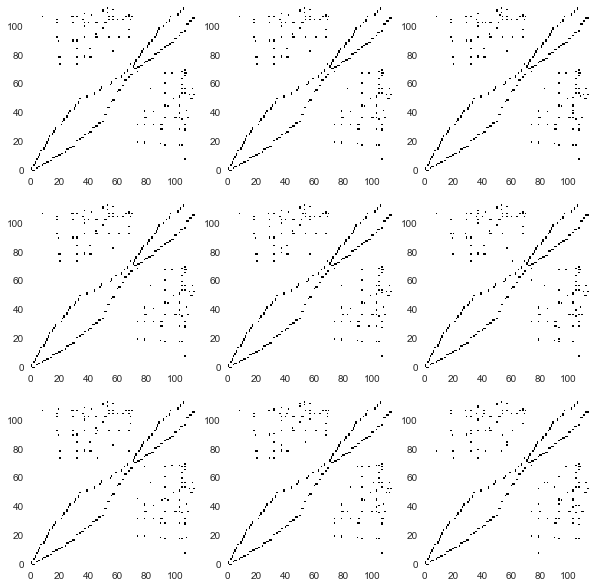

In [20]:
figure(figsize=(10,10))
for i in xrange( 9 ) :
    subplot(3,3,i+1)
    aj = graph_spectral_density( SLT, additions=0, deletions=0, swaps=i, mode='adjacency' )
    pcolor( aj )
    xlim( (0,aj.shape[1]) )
    ylim( (0,aj.shape[0]) )
    #xticks = []
    #yticks = []

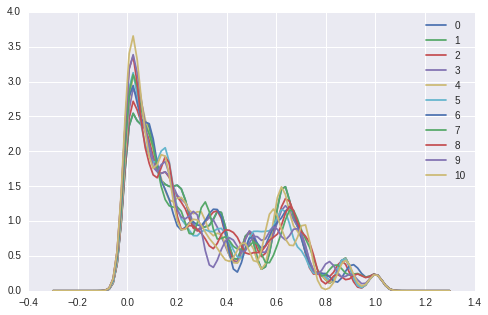

In [86]:
figure( figsize=(8,5) )
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=0, deletions=int(i), swaps=0 )['graph']
    seaborn.kdeplot( lambdas / lambdas.max(), label=int(i), bw=0.1 )
#savefig( 'spectral-gophers.png' )

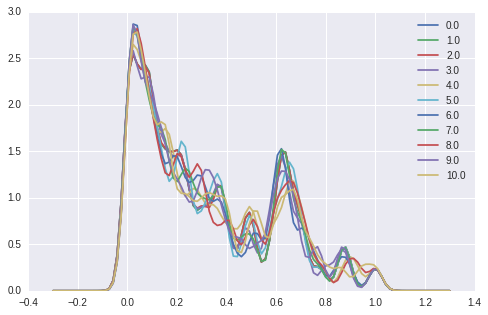

In [88]:
figure( figsize=(8,5) )
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=0, deletions=0, swaps=int(i) )['graph']
    seaborn.kdeplot( lambdas / lambdas.max(), label=i, bw=0.1 )

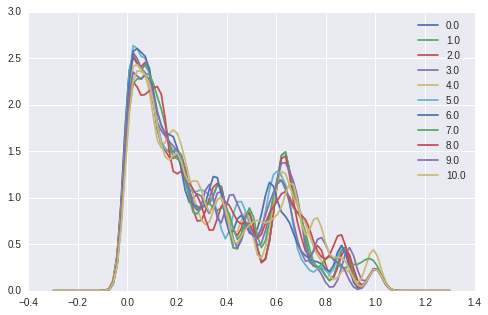

In [89]:
figure( figsize=(8,5) )
for i in linspace( 0, 10, 11 ) :
    lambdas = graph_spectral_density( SLT, additions=int(i), deletions=0, swaps=0 )['graph']
    seaborn.kdeplot( lambdas / lambdas.max(), label=i, bw=0.1 )

In [109]:
from scipy.stats import skew, entropy, gaussian_kde, kurtosis
import pyprind

def spectral_density( mgl ) :
    lambdas, vectors = linalg.eig( mgl )
    kde = gaussian_kde( lambdas / max( lambdas ) )
    return kde.pdf( linspace( -0.5,1.5,100) )

def pdd( a, b ) :
    return ( 0.5 * entropy( a, b ) + 0.5 * entropy( b, a ) )**(0.5)

#studies = [ { 'name' : 'Gopher, Lice',
#              'host' : 'data/gopher-louse/gopher.tree',
#              'guest': 'data/gopher-louse/lice.tree',
#              'links': 'data/gopher-louse/gopher-louse-associations.csv' },
#           
#            { 'name' : 'Fruit, Birds of Paradise',
#              'host' : 'data/plant-pollinators/beeh/plant.tree',
#              'guest': 'data/plant-pollinators/beeh/animal.tree',
#              'links': 'data/plant-pollinators/beeh/beeh_links.csv' },
#          
#          ]

cases = []

fraction = 0.3

progbar = pyprind.ProgBar( (len(studies) + 100)*11**2, monitor=True, title='building space...' )

for study in null_studies + perfect_studies + studies  :
    
    T1 = SuchTree( study['host'] )
    T2 = SuchTree( study['guest'] )
    links = pd.DataFrame.from_csv( study['links'] )
    links = links[ T1.leafs.keys() ]
    links = links.T[ T2.leafs.keys() ]
    SLT = SuchLinkedTrees( T1, T2, links )
    
    tested = set()
    
    if study['name'].__contains__( 'null' ) :
        group = 'null'
    elif study['name'].__contains__( 'perfect' ) :
        group = 'perfect'
    else :
        group = 'data'
    
    #for i in linspace( 0, fraction, 11 ) :
    for i in [0] :
        for j in linspace( 0, fraction, 11 ) :
        #for j in [0] :
            for k in linspace( 0, fraction, 11 ) :
                progbar.update()
                I,J,K = i * SLT.n_links, j * SLT.n_links, k * SLT.n_links
                if (I,J,K) in tested : continue
                tested.add( (I,J,K) )
                result = graph_spectral_density( SLT, additions=int(I), deletions=int(J), swaps=int(K) )
                lambdas = result['graph']
                lambdas_h = result['host']
                lambdas_g = result['guest']
                sd = gaussian_kde( lambdas ).pdf( linspace( -0.5,1.5,100) )
                sd_h = gaussian_kde( lambdas_h ).pdf( linspace( -0.5,1.5,100) )
                sd_g = gaussian_kde( lambdas_g ).pdf( linspace( -0.5,1.5,100) )
                cases.append( { 'study'     : study['name'],
                                'group'     : group,
                                'n_hosts'   : SLT.TreeA.n_leafs,
                                'n_guests'  : SLT.TreeB.n_leafs,
                                'n_links'   : SLT.n_links,
                                'deletions' : int(I),
                                'additions' : int(J),
                                'swaps'     : int(K),
                                'skew'      : real(skew( sd )),
                                'kurtosis'  : real(kurtosis( sd )),
                                'eigengap'  : real(sorted(lambdas)[-1] - sorted(lambdas)[-2] ),
                                'treedist'  : pdd( sd_h, sd_g ) } )

S = pd.DataFrame( cases )[ ['study', 'group', 'n_hosts', 'n_guests', 'n_links', 
                            'additions', 'deletions', 'swaps', 'skew', 
                            'kurtosis', 'eigengap', 'treedist'] ]

building space...
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:18:52


In [113]:
S.to_csv( 'spectral_properties.csv' )

/home/russell/opt/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


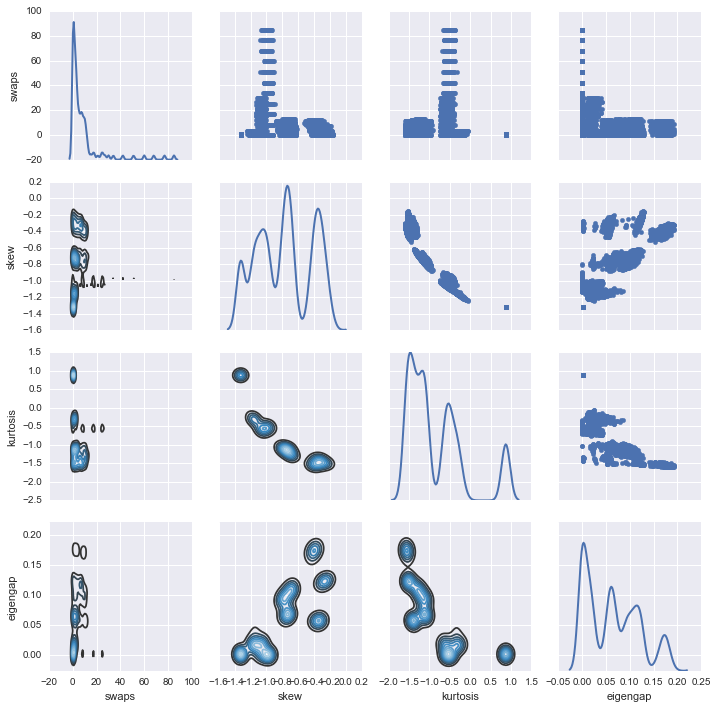

In [38]:
grid = seaborn.PairGrid(S[['swaps', 'skew', 'kurtosis', 'eigengap']], diag_sharey=False)
grid.map_lower(seaborn.kdeplot, cmap="Blues_d")
grid.map_upper(scatter)
grid.map_diag(seaborn.kdeplot, lw=2)

/home/russell/opt/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


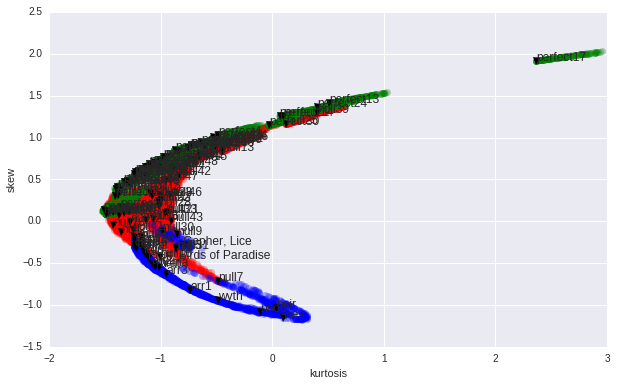

In [112]:
figure( figsize=(10,6) )

var1 = 'kurtosis'
var2 = 'skew'

#study_names = [ 'Gopher, Lice', 'Fruit, Birds of Paradise' ]
#colors = [ 'red', 'blue' ]

originals = S.drop_duplicates(['study','additions','deletions','swaps'])[ ( S['additions'] == 0 ) & ( S['deletions'] == 0 ) & ( S['swaps'] == 0 ) ]

#study_names = map( lambda x : x['name'], studies )

study_names = originals['study']

for s in study_names :
    if s.__contains__( 'null' ) :
        color = 'red'
    elif s.__contains__( 'perfect' ) :
        color = 'green'
    else :
        color = 'blue'
    plot( #S[ S['study'] == s][ S['deletions'] == 0 ][var1], 
          #S[ S['study'] == s][ S['deletions'] == 0 ][var2],
          S[ S['study'] == s][var1],
          S[ S['study'] == s][var2],
          marker='o',
          lw=0,
          alpha=0.3,
          label=s,
          color=color)

xlabel( var1 )
ylabel( var2 )

#legend(loc=7)

plot( originals[var1], originals[var2], marker='v', lw=0, color='k' )

for name,v1,v2 in zip( originals['study'], originals[var1], originals[var2] ) :
    text( v1+0.0001, v2+0.0001, name )

In [53]:
#originals.to_csv('spectral_space.csv')
#S['norm_eigengap'] =  S['eigengap'] / ( S['n_hosts'] + S['n_guests'] )

for i in xrange( len(cases) ) :
    if cases[i]['study'].startswith('null') :
        cases[i]['group'] = 'rgb(255,0,0)'
    elif cases[i]['study'].startswith('perfect') :
        cases[i]['group'] = 'rgb(0,255,0)'
    else :
        cases[i]['group'] = 'rgb(0,0,255)'

S = pd.DataFrame( cases )[ ['study', 'group', 'n_hosts', 'n_guests', 'n_links', 
                            'additions', 'deletions', 'swaps', 'skew', 
                            'kurtosis', 'eigengap', 'treedist'] ]
originals = S.drop_duplicates(['study','additions','deletions','swaps'])[ ( S['additions'] == 0 ) & ( S['deletions'] == 0 ) & ( S['swaps'] == 0 ) ]
originals.to_csv('spectral_space.csv')

/home/russell/opt/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


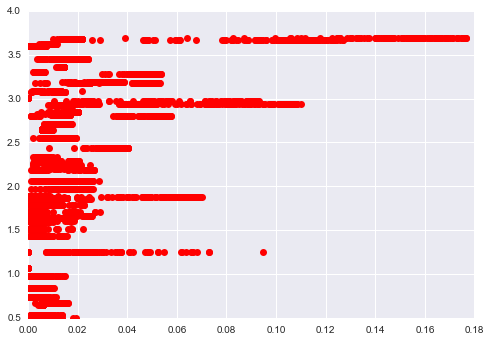

In [29]:
plot( S['eigengap'], S['n_links'] / ( S['n_hosts'] + S['n_guests'] ), 'ro' )

In [104]:
studies = [ { 'name' : 'Gopher, Lice',
              'host' : 'data/gopher-louse/gopher.tree',
              'guest': 'data/gopher-louse/lice.tree',
              'links': 'data/gopher-louse/links.csv' },
           
            { 'name' : 'Fruit, Birds of Paradise',
              'host' : 'data/plant-pollinators/beeh/plant.tree',
              'guest': 'data/plant-pollinators/beeh/animal.tree',
              'links': 'data/plant-pollinators/beeh/beeh_links.csv' },

            { 'name' : 'arr1',
              'host' : 'data/plant-pollinators/arr1/plant.tree',
              'guest': 'data/plant-pollinators/arr1/animal.tree',
              'links': 'data/plant-pollinators/arr1/arr1_links.csv' },
           
            { 'name' : 'arr2',
              'host' : 'data/plant-pollinators/arr2/plant.tree',
              'guest': 'data/plant-pollinators/arr2/animal.tree',
              'links': 'data/plant-pollinators/arr2/arr2_links.csv' },
           
            { 'name' : 'arr3',
              'host' : 'data/plant-pollinators/arr3/plant.tree',
              'guest': 'data/plant-pollinators/arr3/animal.tree',
              'links': 'data/plant-pollinators/arr3/arr3_links.csv' },
           
            { 'name' : 'bair',
              'host' : 'data/plant-pollinators/bair/plant.tree',
              'guest': 'data/plant-pollinators/bair/animal.tree',
              'links': 'data/plant-pollinators/bair/bair_links.csv' },
            
            { 'name' : 'cacg',
              'host' : 'data/plant-pollinators/cacg/plant.tree',
              'guest': 'data/plant-pollinators/cacg/animal.tree',
              'links': 'data/plant-pollinators/cacg/cacg_links.csv' },
           
            { 'name' : 'caco',
              'host' : 'data/plant-pollinators/caco/plant.tree',
              'guest': 'data/plant-pollinators/caco/animal.tree',
              'links': 'data/plant-pollinators/caco/caco_links.csv' },
           
            { 'name' : 'caci',
              'host' : 'data/plant-pollinators/caci/plant.tree',
              'guest': 'data/plant-pollinators/caci/animal.tree',
              'links': 'data/plant-pollinators/caci/caci_links.csv' },
           
            { 'name' : 'cafr',
              'host' : 'data/plant-pollinators/cafr/plant.tree',
              'guest': 'data/plant-pollinators/cafr/animal.tree',
              'links': 'data/plant-pollinators/cafr/cafr_links.csv' },
           
            { 'name' : 'cllo',
              'host' : 'data/plant-pollinators/cllo/plant.tree',
              'guest': 'data/plant-pollinators/cllo/animal.tree',
              'links': 'data/plant-pollinators/cllo/cllo_links.csv' },
            
            { 'name' : 'fros',
              'host' : 'data/plant-pollinators/fros/plant.tree',
              'guest': 'data/plant-pollinators/fros/animal.tree',
              'links': 'data/plant-pollinators/fros/fros_links.csv' },

            { 'name' : 'hrat',
              'host' : 'data/plant-pollinators/hrat/plant.tree',
              'guest': 'data/plant-pollinators/hrat/animal.tree',
              'links': 'data/plant-pollinators/hrat/hrat_links.csv' },

            { 'name' : 'moma',
              'host' : 'data/plant-pollinators/moma/plant.tree',
              'guest': 'data/plant-pollinators/moma/animal.tree',
              'links': 'data/plant-pollinators/moma/moma_links.csv' },
           
            { 'name' : 'nnog',
              'host' : 'data/plant-pollinators/nnog/plant.tree',
              'guest': 'data/plant-pollinators/nnog/animal.tree',
              'links': 'data/plant-pollinators/nnog/nnog_links.csv' },

            { 'name' : 'smal',
              'host' : 'data/plant-pollinators/smal/plant.tree',
              'guest': 'data/plant-pollinators/smal/animal.tree',
              'links': 'data/plant-pollinators/smal/smal_links.csv' },

            { 'name' : 'wyth',
              'host' : 'data/plant-pollinators/wyth/plant.tree',
              'guest': 'data/plant-pollinators/wyth/animal.tree',
              'links': 'data/plant-pollinators/wyth/wyth_links.csv' },

            { 'name' : 'wes',
              'host' : 'data/plant-pollinators/wes/plant.tree',
              'guest': 'data/plant-pollinators/wes/animal.tree',
              'links': 'data/plant-pollinators/wes/wes_links.csv' },
           
          ]

null_studies = []

for i in xrange(50) :
    name = 'null' + str(i)
    path = 'data/simulated/null/' + name
    s = { 'name'  : name,
          'host'  : path + '/host.tree',
          'guest' : path + '/guest.tree',
          'links' : path + '/links.csv' }
    null_studies.append(s)
    
perfect_studies = []

for i in xrange(50) :
    name = 'perfect' + str(i)
    path = 'data/simulated/perfect/' + name
    s = { 'name'  : name,
          'host'  : path + '/host.tree',
          'guest' : path + '/guest.tree',
          'links' : path + '/links.csv' }
    perfect_studies.append(s)    

In [107]:
from scipy.stats import skew, entropy, gaussian_kde, kurtosis
import pyprind

def pdd( a, b ) :
    return ( 0.5 * entropy( a, b ) + 0.5 * entropy( b, a ) )**(0.5)

spd = zeros( ( len(studies), len(studies) ) )

progbar = pyprind.ProgBar( len(studies)**2, monitor=True, title='building space...' )
for i,study1 in enumerate(studies) :
    for j,study2 in enumerate(studies) :
        progbar.update()
        if i == j : continue
        
        T11 = SuchTree( study1['host'] )
        T12 = SuchTree( study1['guest'] )
        links1 = pd.DataFrame.from_csv( study1['links'] )
        links1 = links1[ T11.leafs.keys() ]
        links1 = links1.T[ T12.leafs.keys() ]
        SLT1 = SuchLinkedTrees( T11, T12, links1 )
        
        T21 = SuchTree( study2['host'] )
        T22 = SuchTree( study2['guest'] )
        links2 = pd.DataFrame.from_csv( study2['links'] )
        links2 = links2[ T21.leafs.keys() ]
        links2 = links2.T[ T22.leafs.keys() ]
        SLT2 = SuchLinkedTrees( T21, T22, links2 )
        
        eigenvals1 = graph_spectral_density( SLT1 )['graph']
        eigenvals2 = graph_spectral_density( SLT2 )['graph']
        
        
        gsdd1 = gaussian_kde( eigenvals1 / max( eigenvals1 ) ).pdf( linspace( -0.5,1.5,100) )
        gsdd2 = gaussian_kde( eigenvals2 / max( eigenvals2 ) ).pdf( linspace( -0.5,1.5,100) )
                
        spd[i,j] = pdd( gsdd1, gsdd2 )

building space...
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:30


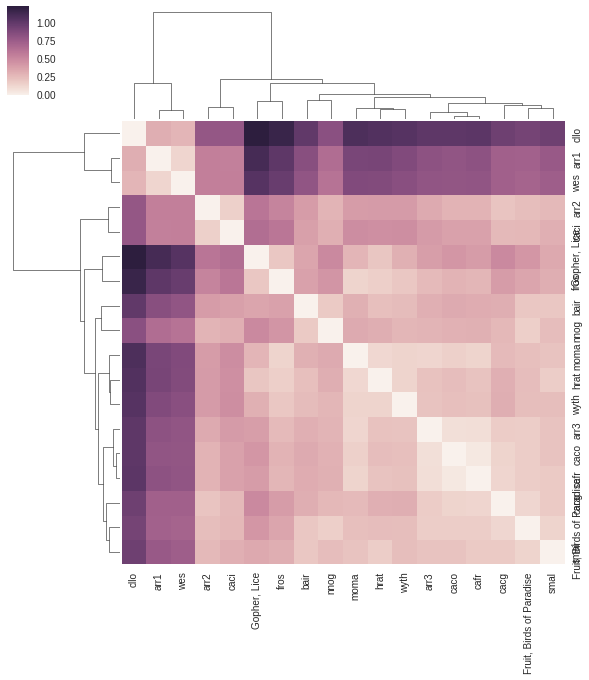

In [108]:
studynames = map( lambda x : x['name'], studies )
seaborn.clustermap( pd.DataFrame( spd, index=studynames, columns=studynames ) )

In [124]:
SLT2.TreeA.leafs

{'Bryonia_dioica': 12,
 'Crataegus_monogyna': 10,
 'Euonymus_europaeus': 2,
 'Hedera_helix': 16,
 'Lonicera_periclymenum': 20,
 'Prunus_spinosa': 4,
 'Rosa_sp.': 8,
 'Rubus_sp.': 6,
 'Sambucus_nigra': 18,
 'Solanum_dulcamara': 14,
 'Tamus_communis': 0}

In [12]:
std( host_aj.flatten()[ host_aj.flatten() > SLT.TreeB.polytomy_distance ] )

0.28747978728803447

In [15]:
host_aj

array([[  0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00

In [46]:
array([SLT.TreeA.polytomy_distance])[0] > array([SLT.TreeA.polytomy_distance])[0]

False

In [21]:
host_aj.dtype

dtype('float64')

In [53]:
type(SLT.TreeA.polytomy_distance)

float

In [57]:
np.finfo( np.float64 ).eps

2.2204460492503131e-16

In [97]:
import dendropy
import os

N_min, N_max = 10, 200

for i in xrange(50) :
    
    N = randint( N_min, N_max )
    M = randint( N_min, N_max )
    L = randint( 0.5*( N+M ), 4.0*( N+M ) )

    host_taxa =  [ 'host_'  + str(x) for x in xrange(N) ]
    guest_taxa = [ 'guest_' + str(x) for x in xrange(M) ]
    
    ht = dendropy.simulate.treesim.birth_death_tree( 1.0, 0.5, 
                                                     #birth_rate_sd=0.5, death_rate_sd=0.5,
                                                     ntax=len(host_taxa) )
    
    gt = dendropy.simulate.treesim.birth_death_tree( 1.0, 0.5, 
                                                     #birth_rate_sd=0.5, death_rate_sd=0.5,
                                                     ntax=len(guest_taxa) )
    
    for leaf,name in zip(ht.leaf_node_iter(),host_taxa) :
        leaf.taxon.label = name
    
    for leaf,name in zip(gt.leaf_node_iter(),guest_taxa) :
        leaf.taxon.label = name
    
    lm = zeros( (M,N) )
    for j in xrange(L) :
        lm[ randint(M), randint(N) ] = 1
    
    lmdf = pd.DataFrame( lm, columns=host_taxa, index=guest_taxa, dtype=int )
    
    path = 'data/simulated/null/null' + str(i) +'/'
    if not os.path.exists( path ) :
        os.mkdir( path )

    ht.write( file=open( path + 'host.tree', 'w'),  schema='newick' )
    gt.write( file=open( path + 'guest.tree', 'w'), schema='newick' )
    lmdf.to_csv( path + 'links.csv' )

In [98]:
import dendropy
import os

N_min, N_max = 10, 200

for i in xrange(50) :
    
    N = randint( N_min, N_max )
    
    path = 'data/simulated/perfect/perfect' + str(i) +'/'
    if not os.path.exists( path ) :
        os.mkdir( path )
        
    host_taxa =  [ 'host_'  + str(x) for x in xrange(N) ]
    guest_taxa = [ 'guest_' + str(x) for x in xrange(N) ]
    
    t = dendropy.simulate.treesim.birth_death_tree( 1.0, 0.5, 
                                                    #birth_rate_sd=0.5, death_rate_sd=0.5,
                                                    ntax=len(host_taxa) )
        
    for leaf,name in zip(t.leaf_node_iter(),host_taxa) :
        leaf.taxon.label = name
    
    t.write( file=open( path + 'host.tree', 'w'),  schema='newick' )
    
    for leaf,name in zip(t.leaf_node_iter(),guest_taxa) :
        leaf.taxon.label = name
    
    t.write( file=open( path + 'guest.tree', 'w'), schema='newick' )
    
    lm = zeros( (N,N) )
    for j in xrange(N) :
        lm[ j, j ] = 1
    
    lmdf = pd.DataFrame( lm, columns=host_taxa, index=guest_taxa, dtype=int )
    
    lmdf.to_csv( path + 'links.csv' )

In [194]:
perfect_studies

[{'guest': 'data/perfect/null/perfect0/guest.tree',
  'host': 'data/perfect/null/perfect0/host.tree',
  'links': 'data/perfect/null/perfect0/links.csv',
  'name': 'perfect0'},
 {'guest': 'data/perfect/null/perfect1/guest.tree',
  'host': 'data/perfect/null/perfect1/host.tree',
  'links': 'data/perfect/null/perfect1/links.csv',
  'name': 'perfect1'},
 {'guest': 'data/perfect/null/perfect2/guest.tree',
  'host': 'data/perfect/null/perfect2/host.tree',
  'links': 'data/perfect/null/perfect2/links.csv',
  'name': 'perfect2'},
 {'guest': 'data/perfect/null/perfect3/guest.tree',
  'host': 'data/perfect/null/perfect3/host.tree',
  'links': 'data/perfect/null/perfect3/links.csv',
  'name': 'perfect3'},
 {'guest': 'data/perfect/null/perfect4/guest.tree',
  'host': 'data/perfect/null/perfect4/host.tree',
  'links': 'data/perfect/null/perfect4/links.csv',
  'name': 'perfect4'},
 {'guest': 'data/perfect/null/perfect5/guest.tree',
  'host': 'data/perfect/null/perfect5/host.tree',
  'links': 'data/p

In [131]:
for study in null_studies :

    T1 = SuchTree( study['host'] )
    T2 = SuchTree( study['guest'] )
    links = pd.DataFrame.from_csv( study['links'] )
    SLT = SuchLinkedTrees( T1, T2, links )

In [275]:
eigenvals1

{'graph': array([ -3.82728981e-18,   4.61654141e-03,   6.48950286e-03,
          2.14859936e-02,   4.61273341e-02,   5.04951251e-02,
          7.97623103e-02,   9.10320944e-02,   9.56573698e-02,
          1.40168764e-01,   1.66369940e-01,   1.77744632e-01,
          1.91948587e-01,   2.30159428e-01,   2.85248201e-01,
          2.97810869e-01,   3.55920747e-01,   3.96078633e-01,
          4.05791252e-01,   4.17217286e-01,   4.56220354e-01,
          5.14659926e-01,   5.63647731e-01,   5.68910852e-01,
          5.96709748e-01,   7.04357733e-01,   8.56551365e-01,
          9.19902940e-01,   9.34149587e-01,   9.58027230e-01,
          9.98528572e-01,   1.00000000e+00,   1.04139208e+00,
          1.06816953e+00,   1.07526782e+00,   1.14355594e+00,
          1.32055434e+00,   1.40329021e+00,   1.42977297e+00,
          1.43616517e+00,   1.48445722e+00,   1.54377865e+00,
          1.58281239e+00,   1.59230348e+00,   1.60396900e+00,
          1.62128549e+00,   1.66253138e+00,   1.70746850e+00,

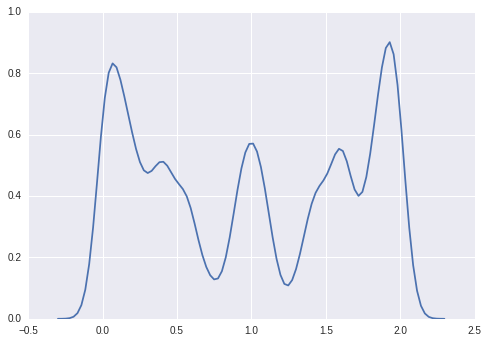

In [80]:
g = igraph.Graph.Weighted_Adjacency( host_aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
host_lp = matrix(g.laplacian( weights='weight', normalized=False ))
g = igraph.Graph.Weighted_Adjacency( guest_aj.tolist(), mode=igraph.ADJ_UNDIRECTED )
guest_lp = matrix(g.laplacian( weights='weight', normalized=False ))

seaborn.kdeplot( eigvals( lp ), bw=0.1 )
#seaborn.kdeplot( eigvals( guest_lp ), bw=0.1 )

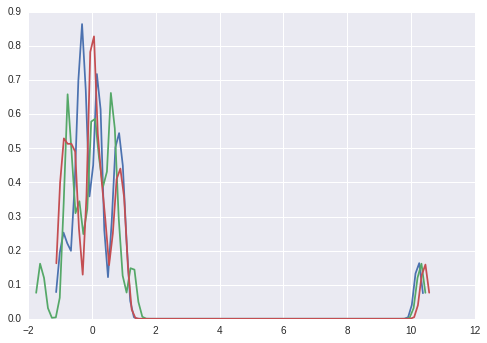

In [14]:
seaborn.kdeplot( eigvals( np.random.rand( 20, 20 ) ), bw=0.05 )
seaborn.kdeplot( eigvals( np.random.rand( 20, 20 ) ), bw=0.05 )
seaborn.kdeplot( eigvals( np.random.rand( 20, 20 ) ), bw=0.05 )

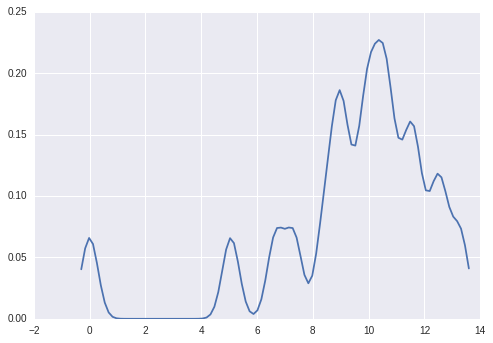

In [47]:
rand_m = - abs( np.random.rand( 20, 20 ) )
rand_s = triu(rand_m) + triu(rand_m).T 

for i in xrange(len(rand_s)) :
    rand_s[i,i] = - ( sum(rand_s[i]) - rand_s[i,i] )

seaborn.kdeplot( eigvalsh( rand_s ), bw=0.1 )
#seaborn.heatmap( rand_s )
#plot( sorted( eigvals( rand_s ) ) )

In [73]:
len(eigvals( host_lp ))

29

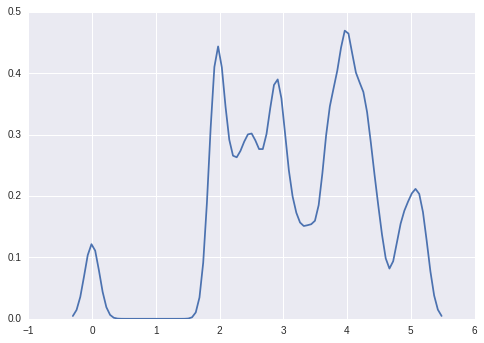

In [78]:
a = """5.1822769298
5.0356117916
4.8413988186
4.4907851684
4.3187031936
4.2546583191
4.1752996878
4.0090175341
3.9938000511
3.9741716411
3.8345096317
3.7240471103
3.6740646072
3.4185899164
3.1837049342
2.9812998514
2.9363725187
2.8557847229
2.7546711349
2.5843515505
2.4881959791
2.3696258942
2.2312063869
2.0767292834
1.9569298188
1.9394601439
1.9274333801
1.06581410364015E-014""".split()
seaborn.kdeplot( array(map( float, a ) ), bw=0.1 )

In [106]:
eigenvals1

{'graph': array([ -3.74937325e-16,   5.09655305e-03,   5.45305246e-03,
          1.62663087e-02,   2.64434320e-02,   4.16620731e-02,
          4.28782773e-02,   5.39530222e-02,   7.37663809e-02,
          1.10084276e-01,   1.30713814e-01,   1.63297609e-01,
          1.96931709e-01,   2.00150130e-01,   2.39379720e-01,
          2.43954684e-01,   2.44690833e-01,   2.54999536e-01,
          2.67276311e-01,   2.96179107e-01,   3.03691352e-01,
          3.95724409e-01,   4.13469953e-01,   4.20091257e-01,
          4.58578120e-01,   4.66255721e-01,   5.47037497e-01,
          5.67163990e-01,   5.82026495e-01,   6.01944730e-01,
          6.61207977e-01,   6.62446534e-01,   7.11897099e-01,
          7.42470203e-01,   8.59898544e-01,   8.65322880e-01,
          9.17521631e-01,   9.79226968e-01,   1.06504001e+00,
          1.07791499e+00,   1.10121406e+00,   1.10269749e+00,
          1.19856956e+00,   1.35203317e+00,   1.41647824e+00,
          1.45036294e+00,   1.45681576e+00,   1.67724229e+00,